In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_csv)
ride_data = pd.read_csv(ride_csv)


# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

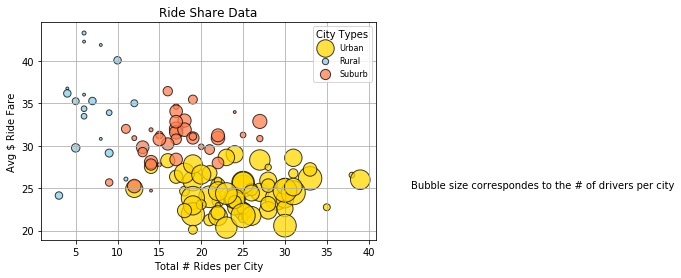

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_type = city_ride_df[city_ride_df["type"] == "Urban"].groupby([city_ride_df["city"]])
rural_type = city_ride_df[city_ride_df["type"] == "Rural"].groupby([city_ride_df["city"]])
suburb_type = city_ride_df[city_ride_df["type"] == "Suburban"].groupby([city_ride_df["city"]])

# Urban ride count = x, average fare = y, average driver count = z
x_urban = urban_type["ride_id"].count()
y_urban = urban_type["fare"].mean()
z_urban = urban_type["driver_count"].mean()

# Rural ride count = x, average fare = y, average driver count = z
x_rural = rural_type["ride_id"].count()
y_rural = rural_type["fare"].mean()
z_rural = rural_type["driver_count"].mean()

# Suburb ride count = x, average fare = y, average driver count = z
x_suburb = suburb_type["ride_id"].count()
y_suburb = suburb_type["fare"].mean()
z_suburb = suburb_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=z_urban * 8, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=z_rural * 8, color=["skyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburb, y_suburb, label = "Suburb", s=z_suburb  * 8, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total # Rides per City")
plt.ylabel("Avg $ Ride Fare")
plt.title("Ride Share Data")


# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Incorporate a text label regarding circle size
plt.text(45,25,"Bubble size correspondes to the # of drivers per city", fontsize = 10)

# Save Figure
plt.savefig("PyberRideSharingData.png", bbox_inches="tight")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

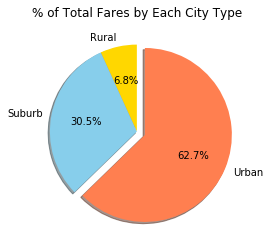

In [4]:
# Calculate Type Percents
grouped_type = city_ride_df.groupby(['type'])
fare_sum = grouped_type['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburb","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by Each City Type")

# Save Figure
plt.savefig("TotalFaresbyCityType.png")


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

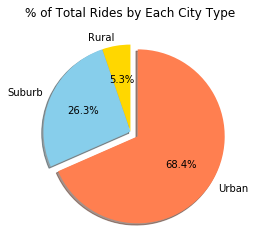

In [6]:
# Calculate Ride Percents
rides_count = grouped_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburb","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by Each City Type")

# Save Figure
plt.savefig("TotalRidesbyCityType.png")


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

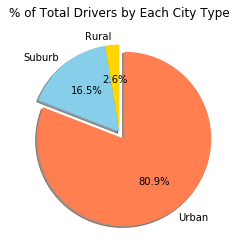

In [8]:
# Calculate Driver Percents
grouped_drivers = city_data.groupby(['type'])
drivers_sum = grouped_drivers['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburb","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by Each City Type")

# Save Figure
plt.savefig("TotalDriversbyCityType.png")


In [9]:
# Show Figure
plt.show()